In [1]:
from quantagrad.module import module
from quantagrad.neural_net import Layer
from quantagrad.activations import ReLU
from quantagrad.loss_functions import CrossEntropyLoss
from quantagrad.optimizers import SGD
from quantagrad.engine import Nodes
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

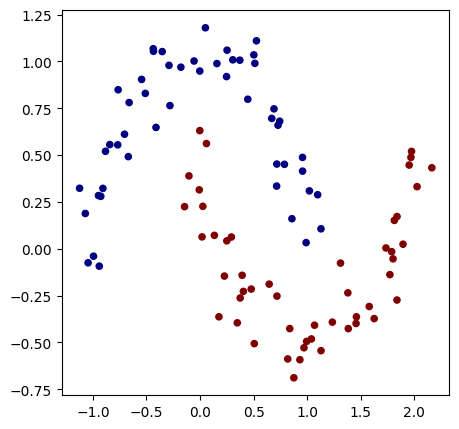

In [2]:

X, y = make_moons(n_samples=100, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [3]:

class digitNetwork(module):
    def __init__(self):
        self.fc1 = Layer(2, 60)
        self.fc2 = Layer(60, 2)
        self.relu = ReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
model = digitNetwork()
criterion = CrossEntropyLoss()
optim = SGD(model.parameters(), lr=0.01, alpha=0)
print(model)

(fc1): Layer(input= 2, output= 60)
(fc2): Layer(input= 60, output= 2)
(relu): ReLU()



In [4]:
epochs = 200
for epoch in range(epochs):
    learning_rate = 1.0 - 0.9*epoch/epochs
    total = 0
    loss_val = 0
    
    input = X
    label = y

    model.zero_grad()
    output = model.forward(input)

    loss = criterion(output, label)

    loss_val = loss.data

    loss.backward()
    optim.lr = learning_rate
    optim.step()
    
    
    pred = np.argmax(output.forward_pass.data, axis=1)

    total = pred == label

    total = np.sum(total)


    print(f"Epoch {epoch+1}: Accuracy: {100*total/y.size}%, Training Loss: {loss_val}")


Epoch 1: Accuracy: 18.0%, Training Loss: [[0.81351353]]
Epoch 2: Accuracy: 75.0%, Training Loss: [[0.67426838]]
Epoch 3: Accuracy: 50.0%, Training Loss: [[0.75839562]]
Epoch 4: Accuracy: 74.0%, Training Loss: [[1.0540716]]
Epoch 5: Accuracy: 83.0%, Training Loss: [[0.35004228]]
Epoch 6: Accuracy: 86.0%, Training Loss: [[0.31901969]]
Epoch 7: Accuracy: 87.0%, Training Loss: [[0.29860808]]
Epoch 8: Accuracy: 87.0%, Training Loss: [[0.28532069]]
Epoch 9: Accuracy: 88.0%, Training Loss: [[0.2763718]]
Epoch 10: Accuracy: 89.0%, Training Loss: [[0.26983524]]
Epoch 11: Accuracy: 89.0%, Training Loss: [[0.26475512]]
Epoch 12: Accuracy: 89.0%, Training Loss: [[0.26046135]]
Epoch 13: Accuracy: 89.0%, Training Loss: [[0.25656091]]
Epoch 14: Accuracy: 89.0%, Training Loss: [[0.25299162]]
Epoch 15: Accuracy: 89.0%, Training Loss: [[0.24965299]]
Epoch 16: Accuracy: 89.0%, Training Loss: [[0.24639253]]
Epoch 17: Accuracy: 89.0%, Training Loss: [[0.24324799]]
Epoch 18: Accuracy: 89.0%, Training Loss: 

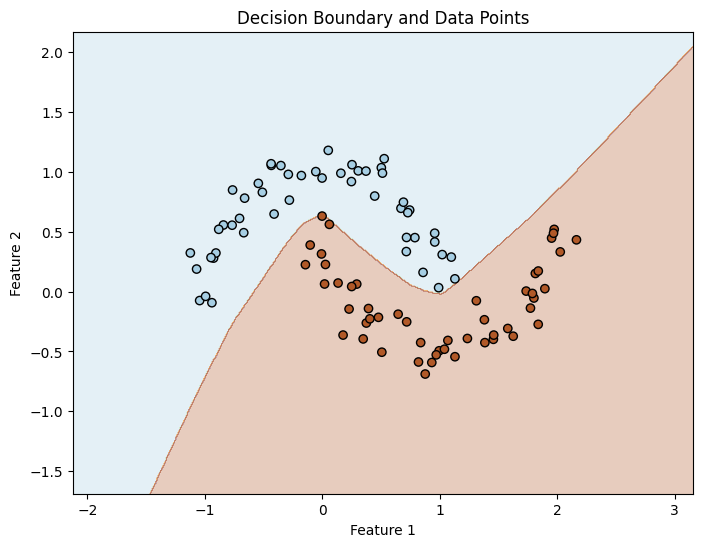

In [5]:
# Create a mesh grid to evaluate the model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model.forward(np.c_[xx.ravel(), yy.ravel()])

Z = np.argmax(Z.forward_pass.data, axis=1)

Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.show()